# LINEAR CLASSIFICATION

## Introduction
In linear regression, the type of data we deal with is quantitative, whereas we use classification models to deal with qualitative data or categorical data. The algorithms used for solving a classification problem first predict the probability of each of the categories of the qualitative variables, as the basis for making the classification. And, as the probabilities are continuous numbers, classification using probabilities also behave like regression methods. 
Logistic regression is one such type of classification model which is used to classify the dependent variable into two or more classes or categories. 

###### Why don’t we use Linear regression for classification problems?


Let’s suppose you took a survey and noted the response of each person as satisfied, neutral or Not satisfied.
Let’s map each category:

Satisfied – 2

Neutral – 1

Not Satisfied – 0

But this doesn’t mean that the gap between Not satisfied and Neutral is same as Neutral and satisfied. There is no mathematical significance of these mapping. We can also map the categories like:

Satisfied – 0

Neutral – 1

Not Satisfied – 2

It’s completely fine to choose the above mapping. If we apply linear regression to both the type of mappings, we will get different sets of predictions. Also, we can get prediction values like 1.2, 0.8, 2.3 etc. which makes no sense for categorical values. So, there is no normal method to convert qualitative data into quantitative data for use in linear regression.
Although, for binary classification, i.e. when there only two categorical values, using the least square method can give decent results. Suppose we have two categories Black and White and we map them as follows:

Black – 0

White - 1 

We can assign predicted values for both the categories such as Y> 0.5 goes to class white and vice versa.
Although, there will be some predictions for which the value can be greater than 1 or less than 0 making them hard to classify in any class. Nevertheless, linear regression can work decently for binary classification but not that well for multi-class classification. 
Hence, we use classification methods for dealing with such problems.

## Logistic Regression

Logistic regression is one such regression algorithm which can be used for performing classification problems. It calculates the probability that a given value belongs to a specific class. If the probability is more than 50%, it assigns the value in that particular class else if the probability is less than 50%, the value is assigned to the other class. Therefore, we can say that logistic regression acts as a binary classifier.

###### Working of a Logistic Model
For linear regression, the model is defined by:
$y = \beta_0 + \beta_1x  $       - (i)

and for logistic regression, we calculate probability, i.e. y is the probability of a given variable x belonging to a certain class. Thus, it is obvious that the value of y should lie between 0 and 1.

But, when we use equation(i) to calculate probability, we would get values less than 0 as well as greater than 1. That doesn’t make any sense
.
So, we need to use such an equation which always gives values between 0 and 1, as we desire while calculating the probability.


#### Sigmoid function 

We use the sigmoid function as the underlying function in Logistic regression. Mathematically and graphically, it is shown as:

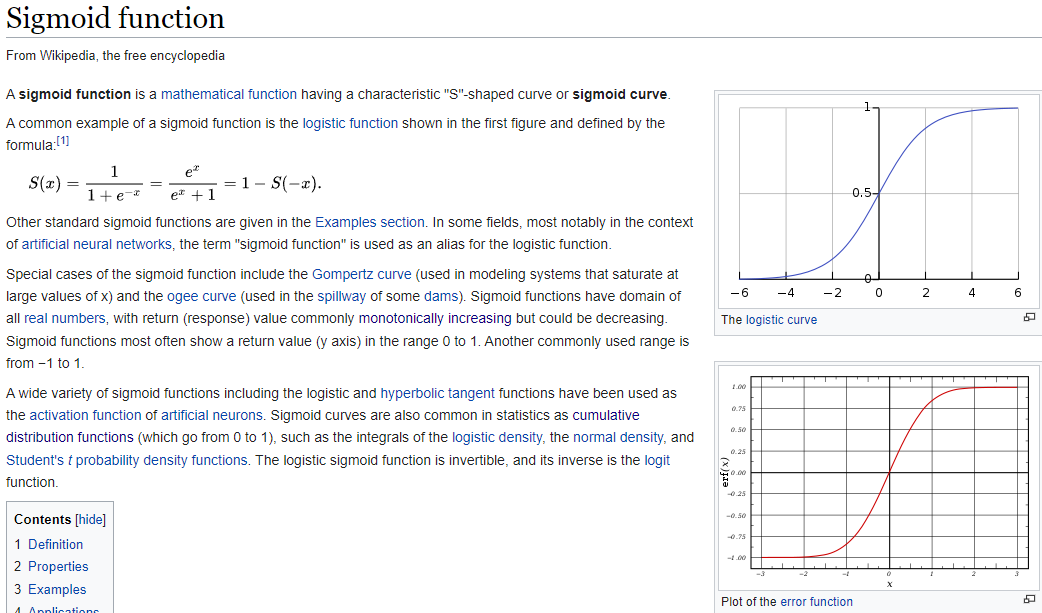

**Why do we use the Sigmoid Function?**

1)	The sigmoid function’s range is bounded between 0 and 1. Thus it’s useful in calculating the probability for the  Logistic function.
2)	 It’s derivative is easy to calculate than other functions which is useful during gradient descent calculation.
3)	It is a simple way of introducing non-linearity to the model.

Although there are other functions as well, which can be used, but sigmoid is the most common function used for logistic regression. We will talk about the rest of the functions in the neural network section.

The logistic function is given as:

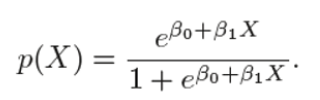

Let’s see some manipulation with the logistic function: 

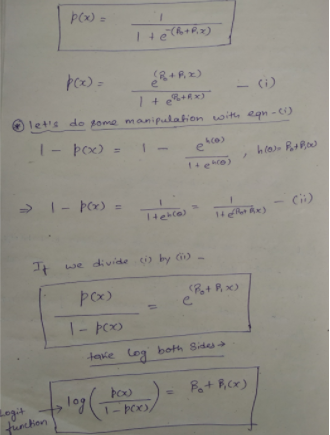

We can see that the logit function is linear in terms with x.

### Prediction

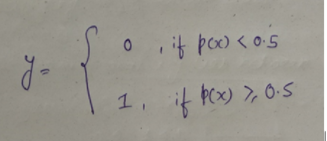


### Cost function

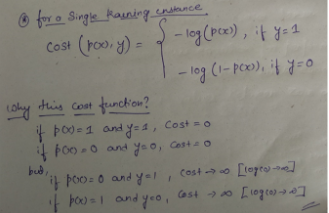

The cost function for the whole training set is given as :

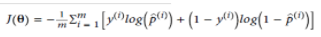

The values of parameters (θ) for which the cost function is minimum is calculated using the gradient descent (as discussed in the Linear Regression section) algorithm. The partial derivative for cost function is given as :

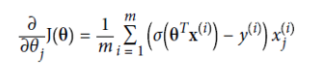

### Multiple Logistic Function

We can generalise the simple logistic function for multiple features as:

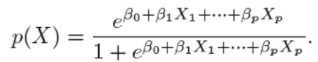

And the logit function can be written as:

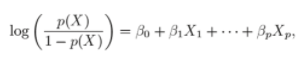

The coefficients are calculated the same we did for simple logistic function, by passing the above equation in the cost function.

Just like we did in multilinear regression, we will check for correlation between different features for Multi logistic as well.

We will see how we implement all the above concept through a practical example.

### Multinomial Logistics Regression( Number of Labels >2)

Many times, there are classification problems where the number of classes is greater than 2. 
We can extend Logistic regression for multi-class classification. The logic is simple; we train our logistic model for each class and calculate the probability(hθx) that a specific feature belongs to that class. Once we have trained the model for all the classes, we predict a new value’s class by choosing that class for which the probability(hθx) is maximum.
Although we have libraries that we can use to perform multinomial logistic regression, we rarely use logistic regression for classification problems where the number of classes is more than 2.
There are many other classification models for such scenarios. We will see more of that in the coming lectures.

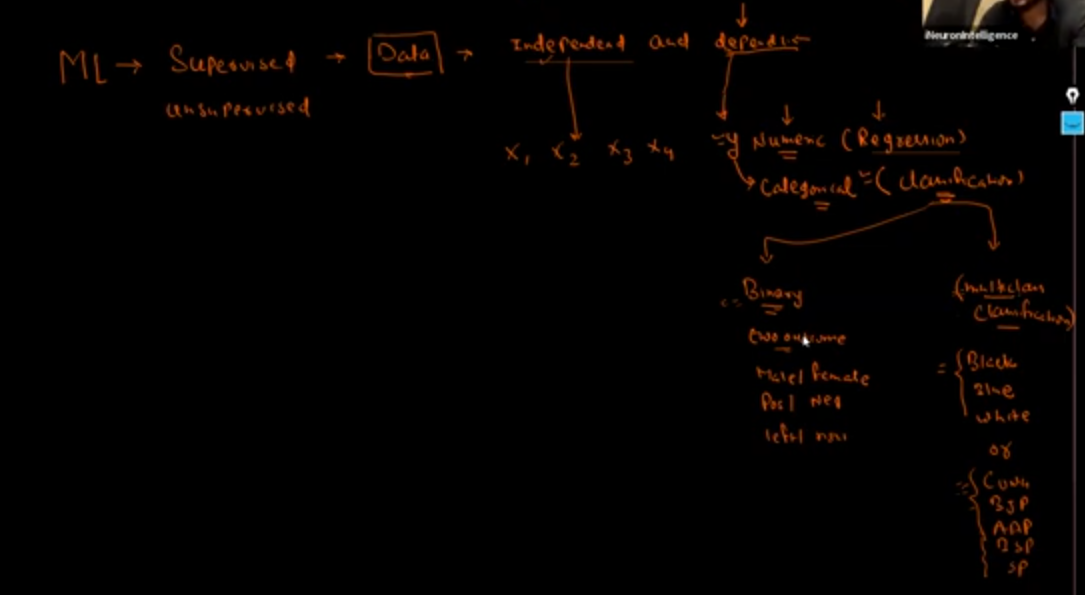

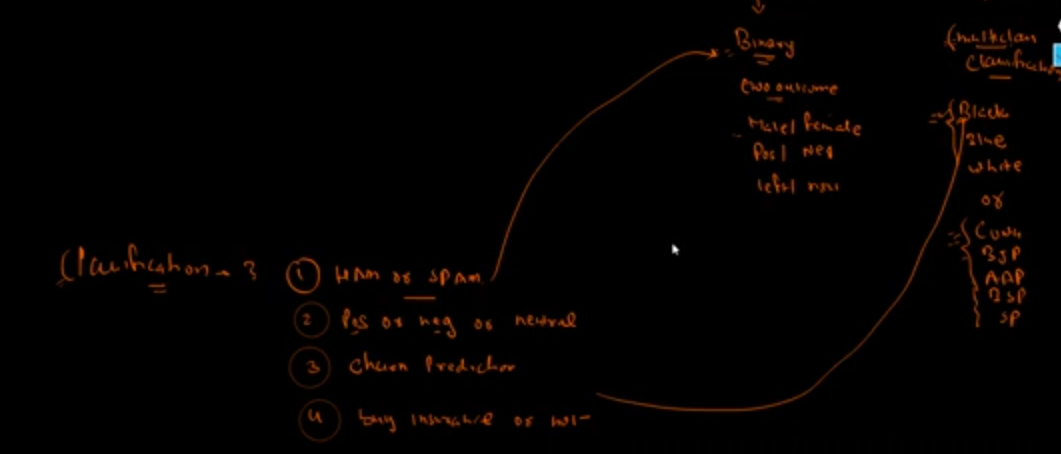

## logistic regression - linear classification
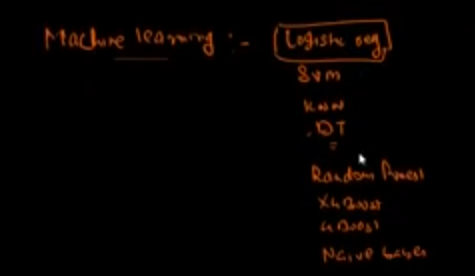

* linear regression to separate linear separable
* if data is linear separable and not linear separable then SVM should be used
* if data is continuos but do not follow a linear approach then we can use any of the other regression approaches

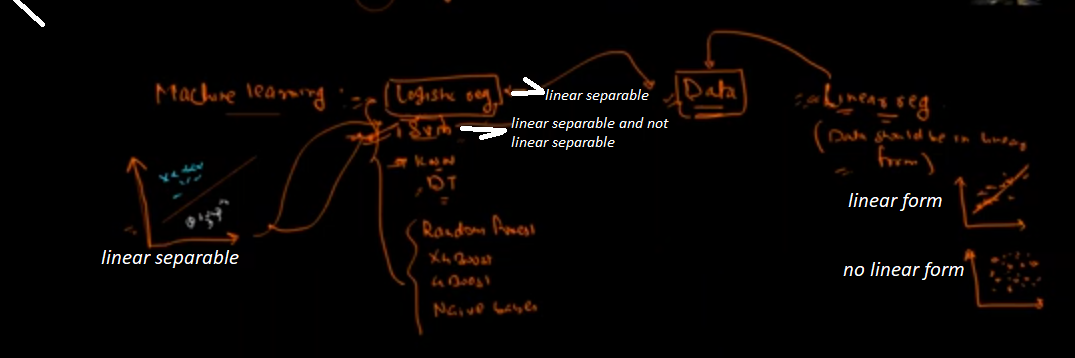

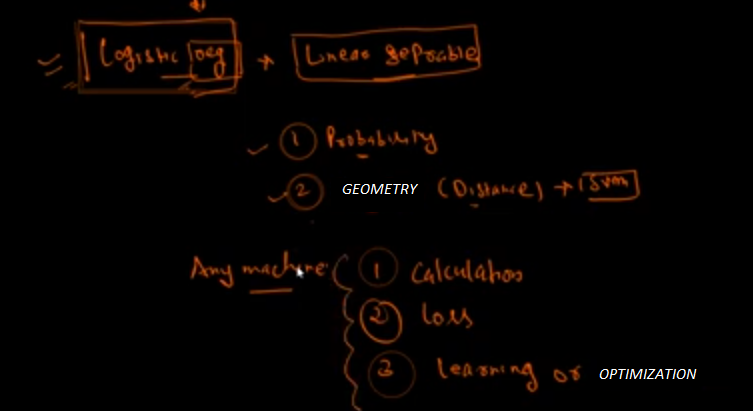

* Binary Classification:

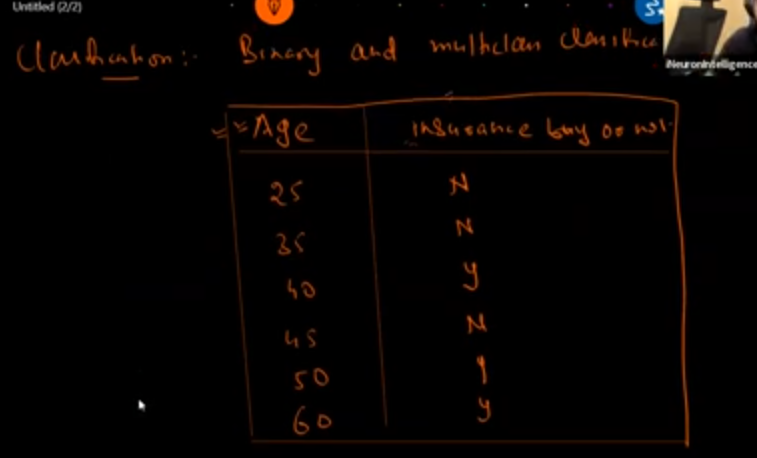

* graphic representation
* a line will not fit our data
* a line may give values higher than 1 and lower than 0

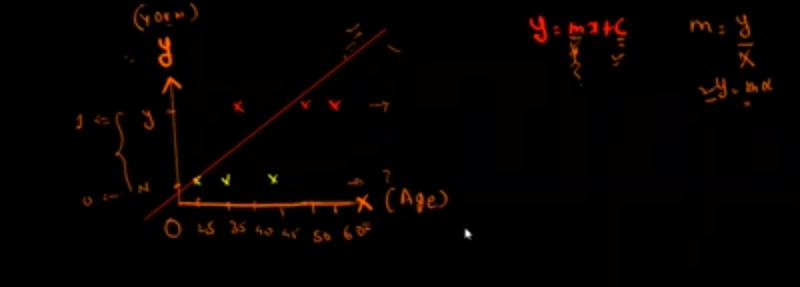

* Use of sigmoid function will allow us to limit our values between zero to one
* by using the liner equation inside of the sigmoid funciton we squeeze the line

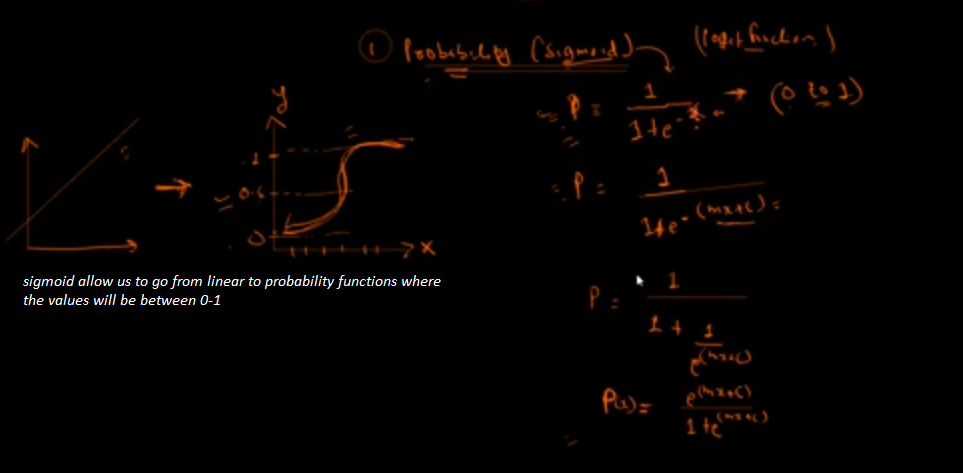

*